<ipython-input-1-541de7a2310c>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


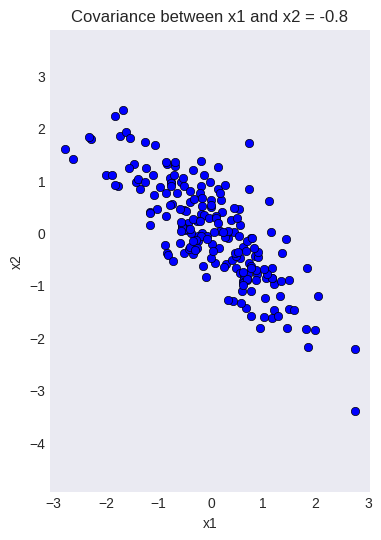

In [1]:
#Start Problem 1A:

# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

# Initializing the random seed
random_seed=42

# List containing the variance
# covariance values
cov_val = [-0.8]

# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])

# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
	plt.subplot(1,3,idx+1)

	# Initializing the covariance matrix
	cov = np.array([[1, val], [val, 1]])

	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)

	# Generating 5000 samples out of the
	# distribution
	data = distr.rvs(size = 200)

	# Plotting the generated samples
	plt.plot(data[:,0],data[:,1], 'o', c='blue',
			markeredgewidth = 0.5,
			markeredgecolor = 'black')
	plt.title(f'Covariance between x1 and x2 = {val}')
	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.axis('equal')

plt.show()


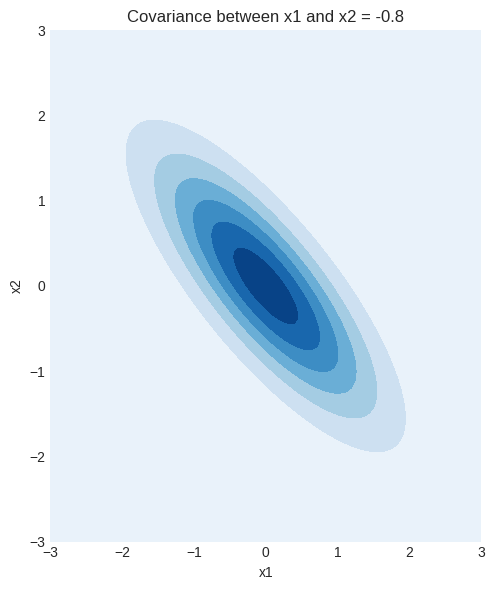

In [2]:
# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):

    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])

    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)

    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]

    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)

    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

    pdf_list.append(pdf)

# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='Blues')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()